In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab\ Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


In [ ]:
!apt-get upgrade
print（'upgrading pip...'）
!python -m pip install --upgrade pip

print('installing music21...')
!pip install --upgrade music21
# enables music21 to render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

# converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
print('done!')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
installing music21...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
installing lilypond...
installing fluidsynth...
done!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
for filename in os.listdir('Book')[:10]:
    print(filename)

A_Remark_You_Made.mid
Autumn_In_New_York.mid
Beethoven_Pathetique.mid
Bess_You_Is….mid
Blue_Room_.mid
Brazilian_Like.mid
Broadway.mid
By_Myself__2.mid
By_The_Time_I_Get….mid
Chelsea_Bridge.mid


In [ ]:
from IPython.display import Image, Audio

def show(music):
  display(Image(str(music.write('lily.png'))))

def play(music):
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 16000 > /dev/null
  display(Audio(f'{filename}.wav'))
  


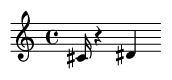

In [ ]:
# test the function
tmps = stream.Stream()
tmps.append(music21.note.Note(step='C', accidental='sharp', octave=4, id='csharp', type='16th'))
tmps.append(music21.note.Rest())
tmps.append(music21.note.Note('D#4'))

play(tmps)
show(tmps)

In [ ]:
#Importing Libraries
import tensorflow 
import numpy as np 
import pandas as pd 
from collections import Counter
import random

from music21 import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(1)

In [ ]:
files

['These_Foolish_Things.mid',
 'Louisiana.mid',
 'The_End_Of_A_Love_Affair.mid',
 'Sweet_Lorraine.mid',
 'Begin_The_Beguine.mid',
 'So_In_Love_(solo).mid',
 'Spain___2.mid',
 'Too_Young_To_Go_Steady.mid',
 'In_Your_Own_Sweet_Way_(tk3).mid',
 'Blue_Bossa_(tk2).mid']

In [ ]:
all_midis= []
filepath='Book/'
files = random.sample(os.listdir(filepath), 10)
for i in files:
    if i.endswith(".mid"):
        tr = filepath+i
        midi = converter.parse(tr)
        all_midis.append(midi)

In [ ]:
s=stream.Stream()
s.append(all_midis[0])
s = s.flatten()
s.show('t')

{0.0} <music21.metadata.Metadata object at 0x7f1086edeb80>
{0.0} <music21.instrument.Marimba 'Melody  (BB): Marimba'>
{0.0} <music21.clef.TrebleClef>
{0.0} <music21.tempo.MetronomeMark largo Quarter=45.23>
{0.0} <music21.key.Key of E- major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest quarter>
{1.0} <music21.tempo.MetronomeMark Quarter=43.79>
{1.0} <music21.note.Rest quarter>
{2.0} <music21.tempo.MetronomeMark Quarter=43.59>
{2.0} <music21.note.Rest quarter>
{3.0} <music21.tempo.MetronomeMark largo Quarter=45.45>
{3.0} <music21.note.Rest quarter>
{4.0} <music21.tempo.MetronomeMark larghetto Quarter=58.92>
{4.0} <music21.note.Rest eighth>
{4.0} <music21.note.Rest half>
{4.5} <music21.chord.Chord E-4 C4>
{4.75} <music21.note.Rest 16th>
{5.0} <music21.tempo.MetronomeMark maestoso Quarter=86.48>
{5.0} <music21.chord.Chord F4 B3>
{5.25} <music21.note.Rest 16th>
{5.5} <music21.chord.Chord G4 B-3>
{6.0} <music21.tempo.MetronomeMark larghetto Quarter=60.13>
{6.0} <music21.

In [ ]:
play(s)

Output hidden; open in https://colab.research.google.com to view.